You can download the `requirements.txt` for this course from the workspace of this lab. `File --> Open...`

# L2-A - Linear Quantization I: Quantize and De-quantize a Tensor

In this lesson, you will learn the fundamentals of linear quantization.

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

In [2]:
import torch

## Quantization with Random `Scale` and `Zero Point`

- Implement Linear Quantization for when the "scale" and the "zero point" are known/randomly selected.

In [12]:
def linear_q_with_scale_and_zero_point(
    tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    # We round the tensor that we pass.
    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    # The last step is to make sure that our rounded tensor is between the minimum quantized value and the maximum quantized value.
    # Then we can finally cast it to the specified type.
    # To get the minimum quantized value we will use the torch.iinfo methods.

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)
    
    return q_tensor

In [13]:
### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [14]:
### these are random values for "scale" and "zero_point"
### to test the implementation
scale = 3.5
zero_point = -70

In [15]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale, zero_point)

In [16]:
quantized_tensor

tensor([[ -15,  -74,  127],
        [ -44,   14, -123],
        [ -70,  126,    0]], dtype=torch.int8)

Exercise: What happens if we don’t cast quantized tensor to float?
What is the impact on the quantized tensor?

## Dequantization with Random `Scale` and `Zero Point`

- Now, Dequantize the tensor to see how precise the quantization is.

In [21]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [ ]:
# this was the original tensor
# [[191.6, -13.5, 728.6],
#  [92.14, 295.5,  -184],
#  [0,     684.6, 245.5]]

In [22]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

In [12]:
### without casting to float
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000, -206.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000, -210.0000,  245.0000]])

In [23]:
def linear_dequantization(quantized_tensor, scale, zero_point):
    return scale * (quantized_tensor.float() - zero_point)

- Calculate `dequantized_tensor` using the function `linear_dequantization`.

In [24]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point)

- Print the results of the `dequantized_tensor`.

In [25]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

### Quantization Error

- Load the `plot_quantization_errors` from the helper file.
- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

In [29]:
from L2_helper import plot_quantization_errors

- Plot the quantization results.

RuntimeError: Numpy is not available

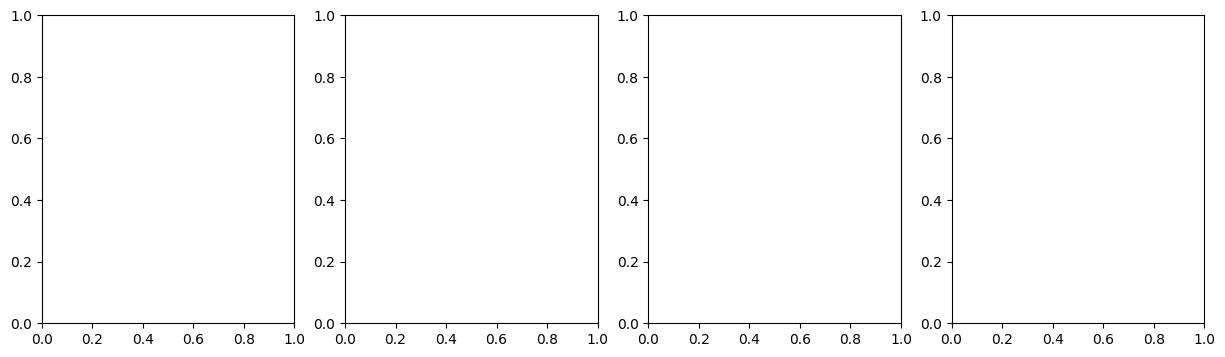

In [ ]:
plot_quantization_errors(test_tensor, quantized_tensor,
                         dequantized_tensor)

**Note:** For the plot above, `Quantization Error Tensor = abs(Original Tensor - Dequantized Tensor)`

Remark that for some entries, there are pretty small values, which shows that the quantization worked pretty well.
But, there also pretty big values (like 39.10 for example).


- Calculate an "overall" quantization error by using [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) technique.

In [17]:
dequantized_tensor - test_tensor

tensor([[  0.9000,  -0.5000, -39.1000],
        [ -1.1400,  -1.5000,  -1.5000],
        [  0.0000,   1.4000,  -0.5000]])

In [18]:
(dequantized_tensor - test_tensor).square()

tensor([[8.0999e-01, 2.5000e-01, 1.5288e+03],
        [1.2996e+00, 2.2500e+00, 2.2500e+00],
        [0.0000e+00, 1.9601e+00, 2.5000e-01]])

In [19]:
(dequantized_tensor - test_tensor).square().mean()

tensor(170.8753)